---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: "Pratheepa Jeganathan"
date: 04/04/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
bibliography: ass6.bib
---

## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

In [250]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
# print(chronic_kidney_disease.metadata) 
  
# variable information 
# print(chronic_kidney_disease.variables) 

### Q1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

In [251]:
print(f'Printing first 5 rows: \n\n {X.head()}.')

Printing first 5 rows: 

     age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  htn   dm cad appet  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2  yes  yes  no  good   
1    NaN  18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   no   no  no  good   
2  423.0  53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   no  yes  no  poor   
3  117.0  56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9  yes   no  no  poor   
4  106.0  26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   no   no  no  good   

    pe  ane  
0   no   no  
1 

In [252]:
print(f" Printing predictors information: \n\n {X.info()}.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [253]:
print(f"Printing predictors statistics: \n\n {X.describe()}.")

Printing predictors statistics: 

               age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.88

The objective of this data set is to predict whether a patient has chronic kidney disease based on various clinical features.

The variables are:
- Demographics: Age, Blood Pressure (bp)
- Specific Gravity (sg): A measure related to the density of urine.
- Albumin Levels (al), Sugar Levels (su): Indicators in the urine suggesting kidney function.
- Red Blood Cell Count (rbc), Pus Cell (pc), and other cellular compositions in the urine.
- Blood Glucose Random (bgr), Blood Urea (bu), Serum Creatinine (sc): Laboratory measurements indicating kidney function.
- Sodium (sod), Potassium (pot), Hemoglobin (hemo): Electrolyte levels and blood parameters.
- Hypertension (htn), Diabetes Mellitus (dm), Coronary Artery Disease (cad): Presence of these conditions which are risk factors for CKD.
- Appetite (appet), Pedal Edema (pe), Anemia (ane): Symptoms that are often associated with CKD.

And the classification problem we want to solve is whether the patient has chronic kidney disease or not.

### Q2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [254]:
#num_col = X.select_dtypes(include={'float64'}).columns
#obj_col = X.select_dtypes(include={'object'}).columns
int_col = ['age', 'bp', 'bgr', 'bu', 'sod', 'pcv', 'wbcc']
float_col = ['sc', 'pot', 'hemo', 'rbcc']
num_col = int_col + float_col
bin_col = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
cate_col = ['sg', 'al', 'su']

X[bin_col+cate_col] = X[bin_col+cate_col].astype('category')

# for cols, type in  zip([int_col, bin_col+cate_col], ['Int64', 'category']):
#     X[cols] = X[cols].astype(type)

binary_mapping = {
    'rbc':{'normal':1, 'abnormal':0},
    'pc' :{'normal':1, 'abnormal':0},
    'pcc' :{'present':1, 'notpresent':0},
    'ba' :{'present':1, 'notpresent':0},
    'htn':{'yes':1, 'no':0},
    'dm' :{'yes':1, 'no':0},
    'cad' :{'yes':1, 'no':0},
    'pe' :{'yes':1, 'no':0},
    'ane' :{'yes':1, 'no':0},
    'appet' :{'good':1, 'poor':0},
}

for column, binary_mapping in binary_mapping.items():
    X[column] = X[column].replace(binary_mapping)

/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/3891760148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bin_col+cate_col] = X[bin_col+cate_col].astype('category')
/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/3891760148.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].replace(binary_mapping)
/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/3891760148.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [255]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,1,0,0


In [256]:
X[num_col] = StandardScaler().fit_transform(X[num_col])
X

/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/75944876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_col] = StandardScaler().fit_transform(X[num_col])


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,NaN,1,0,0,-0.341498,-0.424804,-0.326574,NaN,NaN,0.988022,0.569881,-0.206202,0.481295,1,1,0,1,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,NaN,1,0,0,NaN,-0.781687,-0.396338,NaN,NaN,-0.421688,-0.098536,-0.818559,NaN,0,0,0,1,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,-0.087748,-0.221928,NaN,NaN,-1.006202,-0.878356,-0.308261,NaN,0,1,0,0,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,-0.028268,0.126891,-2.552778,-0.667102,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,0,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,-0.623073,-0.291692,NaN,NaN,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,-0.167055,-0.448661,1.200069,0.085536,1.091172,0.904090,-0.580420,0.188159,0,0,0,1,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,-0.523939,-0.326574,0.334027,-0.353503,1.366237,1.683910,-0.206202,1.458415,0,0,0,1,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,-0.623073,-0.431220,-0.050880,-0.071263,1.125555,1.126896,-0.614440,0.676719,0,0,0,1,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,-0.147229,-0.361456,-0.243334,0.085536,0.575424,1.349701,-0.410321,1.165279,0,0,0,1,0,0


### Q3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [257]:
X.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,3.910000e+02,3.880000e+02,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02
mean,9.994847e-17,-2.380684e-16,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16
std,1.001281e+00,1.001291e+00,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00
min,-2.885708e+00,-1.936857e+00,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00
25%,-5.530393e-01,-4.733701e-01,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01
50%,2.050779e-01,2.583733e-01,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02
75%,7.590867e-01,2.583733e-01,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01
max,2.246163e+00,7.575807e+00,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00


In [258]:
X.shape

(400, 24)

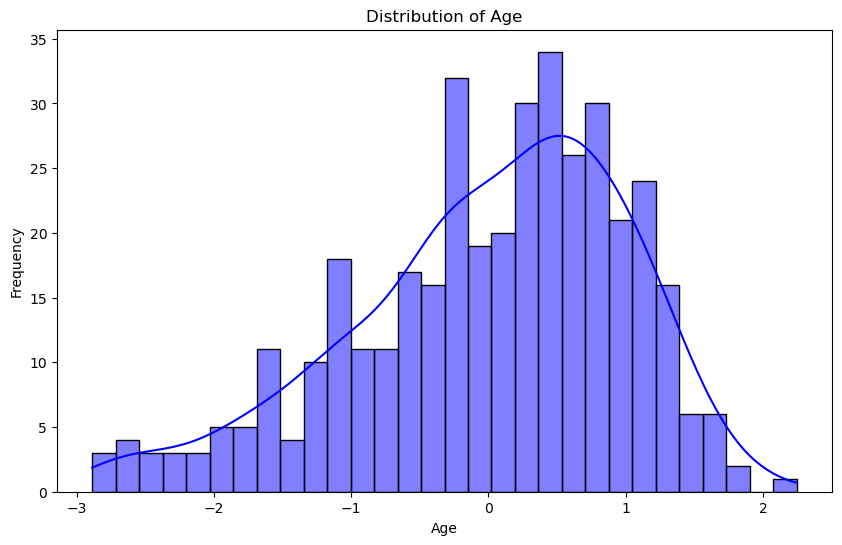

In [259]:
plt.figure(figsize=(10, 6))
sns.histplot(X['age'], kde=True, color="blue", bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Variables and Data Types:
- The dataset now consists of 26 columns, including both original and derived features.
- Numerical Features: age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemoand 3 corrected numerical features pcv, wc, rc. 
- Categorical Features: rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane.
- Target Variable: The classification variable, which indicates whether a patient has chronic kidney disease (ckd) or not, is the primary target for prediction.

Observation Counts:
The dataset comprises 400 entries. 

Distubution:
From the graph we can see, the age of this data set is left skewed.

### Q4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

<AxesSubplot: >

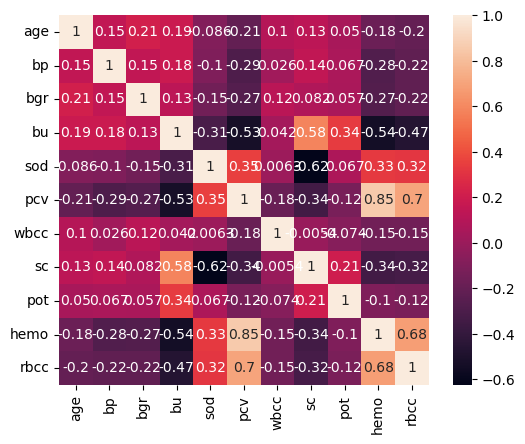

In [260]:
X_float = X[num_col]
X_float = X_float.apply(lambda x: x.fillna(x.mean()),axis = 0)

corrlation_mat = X_float.corr()

sns.heatmap(corrlation_mat,annot = True, cbar = True, square = True)

The variables `sg` and `hemo` show a strong negative correlation with `al`, indicating that as the concentration of albumin in the urine increases, both the specific gravity of urine and the hemoglobin level tend to decrease.
`bgr` and `su` are positively correlated, indicating higher blood glucose will naturally be associated with higher levels of sugar in the urine.

### Q5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [261]:
pd.DataFrame(X.isna().sum()).T

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,9,12,47,46,49,152,65,4,4,44,19,17,87,88,52,71,106,131,2,2,2,1,1,1


We notice there every predictor variables contains `Nan` values where the variable `rbc` contains the most `Nan` of 152, where there are 12 out of 24 predictors contain more than 40 `Nan` values. By earlier investigation, we are aware of we only have 400 observations, where we cannot simply drop these `Nan` from the dataset as this will possibly drop half of the observations. Instead, we want to fill the `Nan` with the median of each predictor variables.

In [262]:
X.select_dtypes(include={float})

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,-0.203139,0.258373,-0.341498,-0.424804,-0.326574,NaN,NaN,0.988022,0.569881,-0.206202,0.481295
1,-2.594124,-1.936857,NaN,-0.781687,-0.396338,NaN,NaN,-0.421688,-0.098536,-0.818559,NaN
2,0.613295,0.258373,3.473064,-0.087748,-0.221928,NaN,NaN,-1.006202,-0.878356,-0.308261,NaN
3,-0.203139,-0.473370,-0.392022,-0.028268,0.126891,-2.552778,-0.667102,-0.456071,-0.766953,-0.580420,-0.788961
4,-0.028189,0.258373,-0.530963,-0.623073,-0.291692,NaN,NaN,-0.318538,-0.432744,-0.376301,-0.104977
...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,-0.101509,-0.167055,-0.448661,1.200069,0.085536,1.091172,0.904090,-0.580420,0.188159
396,-0.553039,-0.473370,-0.922524,-0.523939,-0.326574,0.334027,-0.353503,1.366237,1.683910,-0.206202,1.458415
397,-2.302541,0.258373,-0.606749,-0.623073,-0.431220,-0.050880,-0.071263,1.125555,1.126896,-0.614440,0.676719
398,-2.010957,-1.205114,-0.429915,-0.147229,-0.361456,-0.243334,0.085536,0.575424,1.349701,-0.410321,1.165279


In [263]:
X.select_dtypes(include={'category'}).mode()

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,1.02,0.0,0.0,1,1,0,0,0,0,0,1,0,0


In [264]:
for type in [float, 'category']:
    cols = X.select_dtypes(include=[type]).columns
    if type is float:
        X[cols] = X[cols].fillna(X[cols].median())
    else:
        print(X[cols].mode())
        X[cols] = X[cols].fillna(X[cols].mode().iloc[0])

     sg   al   su rbc pc pcc ba htn dm cad appet pe ane
0  1.02  0.0  0.0   1  1   0  0   0  0   0     1  0   0


/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/1901794532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = X[cols].fillna(X[cols].median())
/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/1901794532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = X[cols].fillna(X[cols].mode().iloc[0])


In [265]:
print(X.isna().sum().sum())

0


### Q6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

We can only perform outlier analysis on the numerical predictor variables

<AxesSubplot: >

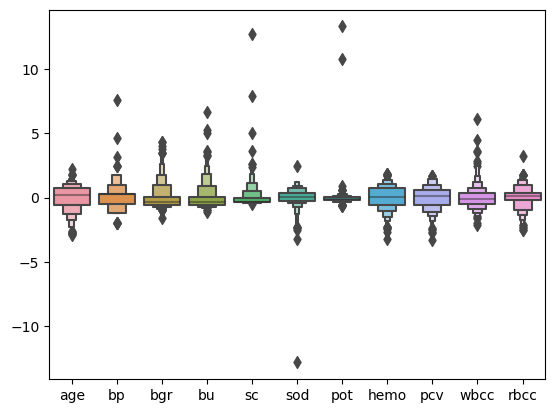

In [266]:
sns.boxenplot(X)

In [267]:
outlier_res = pd.DataFrame()
count_raw, count_dup = [], []
X_float_column = X.select_dtypes(include=[float]).columns
X_temp = X
for col in X_float_column:
    count_dup.append((np.abs(X_temp[col]) >= 3).sum())
    count_raw.append((np.abs(X_temp[col]) >= 3).sum())
    X_temp = X_temp[X_temp[col] <= 3]
outlier_res = pd.DataFrame([count_raw, count_dup])
outlier_res.columns = X_float_column
outlier_res.index = ['raw', 'Independent']
outlier_res

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
raw,0,3,10,9,3,0,1,0,0,4,1
Independent,0,3,10,9,3,0,1,0,0,4,1


In [268]:
outlier_res.sum(axis=1)

raw            31
Independent    31
dtype: int64

Since these outlier are independently existon each variables, which comes to a total of 31 outliers in the dataset and it is 7.75% of the observations. Thus, instead of dropping them, we want to cap the outliers with the percentiles.

In [269]:
min(X['age'])

-2.885707665970754

In [270]:
for col in X_float_column:
    X[col] = np.where(
        np.abs(X[col]) >= 3,
        np.quantile(X[col], 0.95),
        X[col]
    )

/var/folders/d6/qkcygckj3g165qjtcz8jgcxm0000gn/T/ipykernel_31366/3450558690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.where(


### Q7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

### Q8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3, 
    random_state=1
    )

In [273]:
print(X_train.shape, X_test.shape)

(280, 24) (120, 24)


### Q9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

### Q10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

### Q11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

### Q12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

### Q13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
